In [9]:
words = open('names.txt').read().splitlines()
print(f"length of words:{len(words)}\nsample words:{words[:5]}")

length of words:32033
sample words:['emma', 'olivia', 'ava', 'isabella', 'sophia']


In [10]:
print(f"shortest word:{min(words,key=len)}")
print(f"longest word:{max(words,key=len)}")

shortest word:an
longest word:muhammadibrahim


## Bigram Language Model
- Work with two characters at a time
- Given one character, predict the next character
- A simple starting model
- Count the frequency of how many times a second character follows a first character

In [12]:
for w in words[:1]:
    chs = ['<E>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        print(f"{ch1} -> {ch2}")

<E> -> e
e -> m
m -> m
m -> a
a -> <E>


In [13]:
b= {}
for w in words:
    chs = ['<E>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        # a bigram is a tuple of two characters
        # keep track of the number of times we see each bigram
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1
        
sorted(b.items(), key=lambda x: x[1], reverse=True)[:5]

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<E>', 'a'), 4410),
 (('e', '<E>'), 3983)]

Instead of using dictionaries, use pytorch tensors to store the counts, and use a two dicts for mapping characters to indices and vice versa.

In [15]:

chars = sorted(list(set(''.join(words))))
stoi = {ch: i for i, ch in enumerate(chars)}
stoi['<S>'] = 26
stoi['<E>'] = 27

itos = {i: ch for ch, i in stoi.items()}


In [16]:
import torch
N = torch.zeros((28, 28))
for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        i, j = stoi[ch1], stoi[ch2]
        N[i, j] += 1

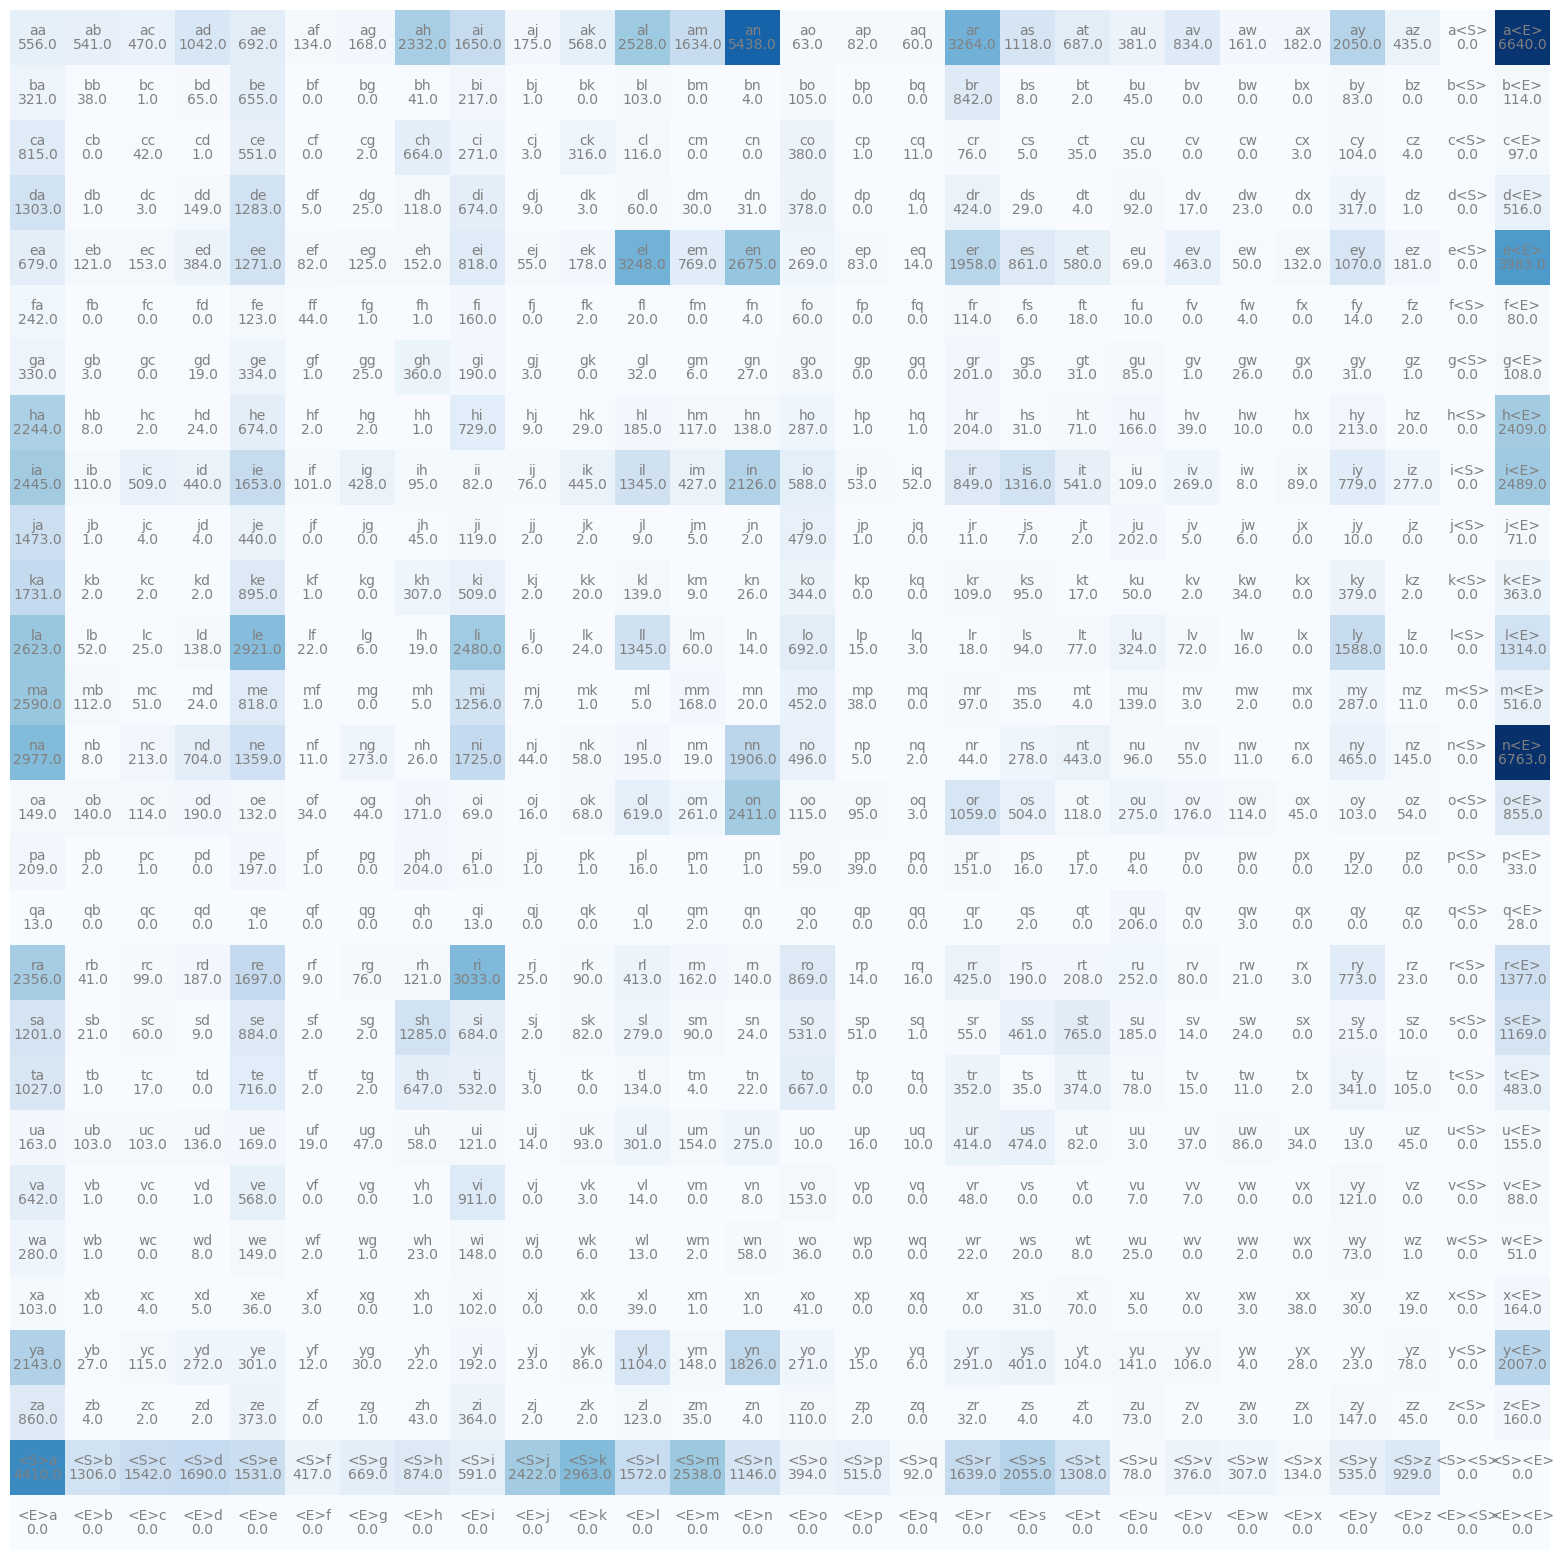

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))
plt.imshow(N, cmap='Blues')



for i in range(len(itos)):
    for j in range(len(itos)):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha='center', va='bottom', color='gray')
        plt.text(j, i, N[i, j].item(), ha='center', va='top', color='gray')

plt.axis('off')
plt.show()

Note that we have a zero row because there is no character after the termination character \<E\>. 
For the same reason, we have a zero column because there is no character before the start character \<S\>.

We can do better by using just one character for the start and end of the sentence.

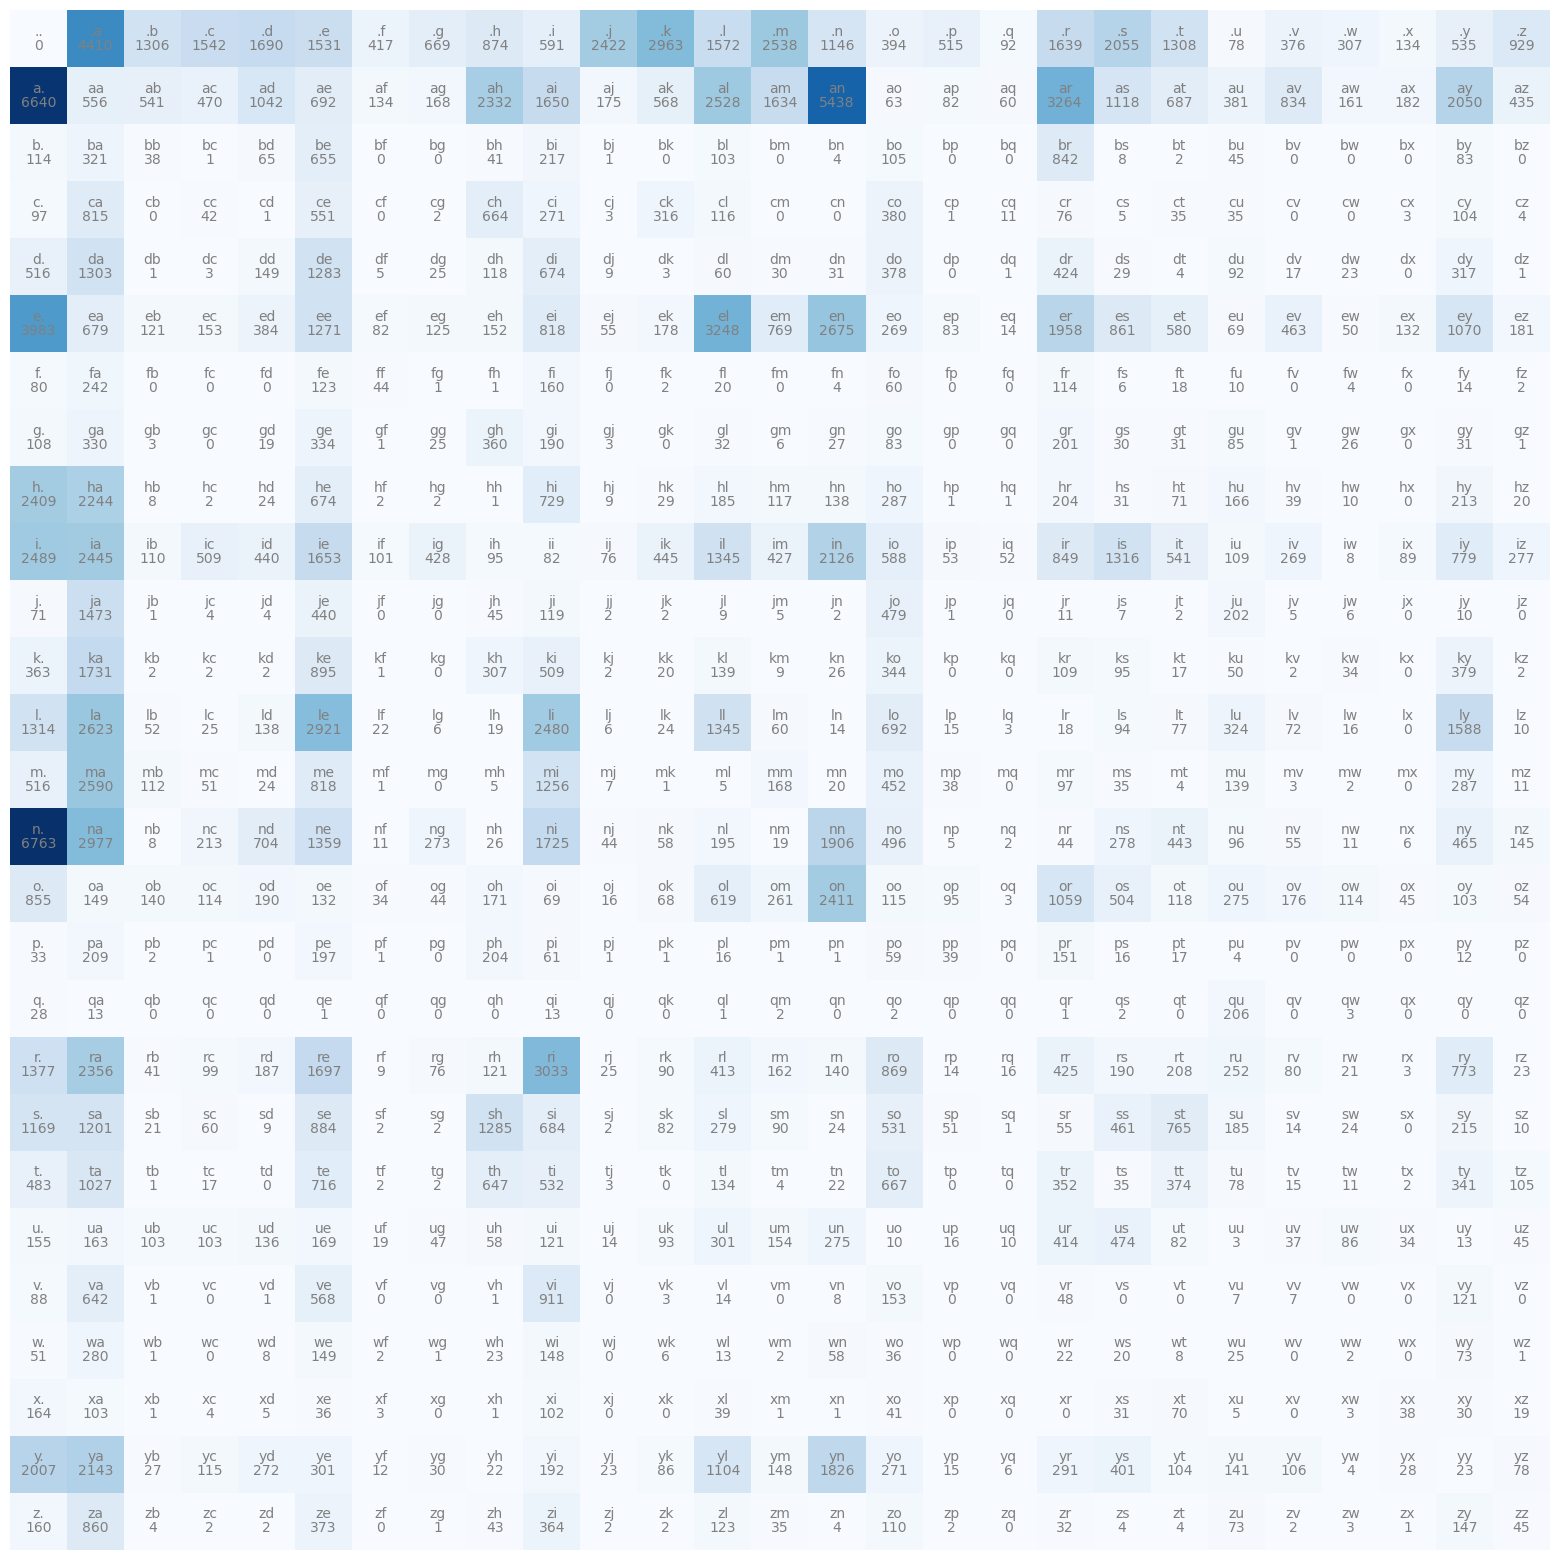

In [18]:
N = torch.zeros((27, 27), dtype=torch.int32)
chars = sorted(list(set(''.join(words))))
stoi = {ch: i+1 for i, ch in enumerate(chars)}
stoi['.']  = 0
itos = {i: ch for ch, i in stoi.items()}

for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        i, j = stoi[ch1], stoi[ch2]
        N[i, j] += 1
        


plt.figure(figsize=(20, 20))
plt.imshow(N, cmap='Blues')

for i in range(len(itos)):
    for j in range(len(itos)):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha='center', va='bottom', color='gray')
        plt.text(j, i, N[i, j].item(), ha='center', va='top', color='gray')

plt.axis('off')
plt.show()

Next: normalise across rows to get a probability distribution.

In [21]:
g = torch.Generator().manual_seed(42)
p = torch.rand(3, generator=g)
p = p / p.sum()
p


tensor([0.4047, 0.4197, 0.1756])

In [26]:
torch.multinomial(p, num_samples= 100, replacement=True, generator=g)

tensor([13,  2,  0, 18,  2, 14,  4, 20, 23,  7, 25,  0, 21, 18, 21, 25, 14, 26,
        13, 14, 25,  7,  1, 14,  0, 14, 18,  0, 26,  8,  1, 22,  8, 12, 14, 13,
         4,  0,  0,  8, 14,  0, 14, 25, 18, 22,  9, 12,  8,  0, 12, 12,  5, 14,
        12,  7, 11, 18, 22,  5,  0,  0,  8,  8,  2,  4, 14, 13, 12, 14,  0, 22,
        12, 18, 14, 25, 14, 18,  0, 12, 12,  8, 18, 14,  0,  1, 22, 22,  7,  9,
        25, 19,  9, 10, 14, 13,  0,  0, 14, 25])

We then sample from the distribution to get random generations of words.

In [37]:
g = torch.Generator().manual_seed(42)
for i in range(10):
    out = []
    ix = 0
    while True:
        p = N[ix].float()
        p = p / p.sum()
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print(''.join(out))
    


anugeenvi.
s.
mabian.
dan.
stan.
silaylelaremah.
li.
le.
epiachalen.
diza.


The words don't sound perfect, but they sound much better than sampling a random uniform distribution of equal weights.

In [38]:
g = torch.Generator().manual_seed(42)
for i in range(10):
    out = []
    ix = 0
    while True:
        p = torch.ones(27)
        p = p / p.sum()
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print(''.join(out))
    

xjugueovtps.
fabiquedxfmubnwmsflaypggzofmwhwlxoln.
epjccuodsgjdmzu.
xnxcmjjobdrggbdllk.
mnqhqyjfbhcvghigeaczalcvjwiajwtphjpdmqsotcc.
welqxosvgkocobr.
uklnncvrigmydysoumf.
pjjiewx.
lhmjuhm.
fsckbirdovhgn.


Broadcasting Semantics:
Two tensors are “broadcastable” if the following rules hold:

- Each tensor has at least one dimension.

- When iterating over the dimension sizes, starting at the trailing dimension, the dimension sizes must either be equal, one of them is 1, or one of them does not exist.

If two tensors x, y are “broadcastable”, the resulting tensor size is calculated as follows:

 - If the number of dimensions of x and y are not equal, prepend 1 to the dimensions of the tensor with fewer dimensions to make them equal length.

 - Then, for each dimension size, the resulting dimension size is the max of the sizes of x and y along that dimension.

In [44]:
P = N.float()  # [27, 27]
P/= P.sum(dim=1, keepdim=True) # [27, 1]

In [45]:
P.shape

torch.Size([27, 27])